In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/noamshayer/DataAnalistProject/main/Affairs.csv'
affairs_df = pd.read_csv(url)
#affairs_df.head()

In [3]:
del affairs_df[affairs_df.columns[0]]
affairs_df.head()
#הטבלה המקורית


,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [4]:
affairs_df['index'] = range(0, len(affairs_df))
new_affairs=affairs_df.copy(deep=True)
#פתחתנו טבלה חדשה

In [5]:
new_affairs['age']=new_affairs['age'].astype(str)
new_affairs['yearsmarried']=new_affairs['yearsmarried'].astype(str)
new_affairs['affairs']=new_affairs['affairs'].astype(str)
new_affairs['education']=new_affairs['education'].astype(str)
new_affairs['rating']=new_affairs['rating'].astype(str)
new_affairs['occupation']=new_affairs['occupation'].astype(str)
new_affairs['religiousness']=new_affairs['religiousness'].astype(str)
#new_affairs.head()
#הפכנו הכל לstr

In [6]:
new_affairs['age']=new_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
new_affairs['affairs']=new_affairs['affairs'].replace({"0":"none","1":"once","2":"twice","3":"3 times","7":"4-10 times","12":"monthly, weekly or daily"})
new_affairs['yearsmarried']=new_affairs['yearsmarried'].replace({"0.125":"3 months or less","0.417":"4-6 months","0.75":"6 months-1 year","1.5":"1-2 years","4.0":"3-5 years","7.0":"6-8 years","10.0":"9-11 years","15.0":"12+ years"})
new_affairs['religiousness']=new_affairs['religiousness'].replace({"1":"anti","2":"not at all","3":"slightly","4":"somewhat","5":"very"})
new_affairs['education']=new_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":" some graduate work","18":"master's degree","20":"advanced degree"})
new_affairs['rating']=new_affairs['rating'].replace({"1":"very unhappy","2":"somewhat unhappy","3":"average","4":"happier than average","5":"very happy"})
new_affairs
#הפיכת המספרים למילים


,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,index
0,none,male,35-39,9-11 years,no,slightly,master's degree,7,happier than average,0
1,none,female,25-29,3-5 years,no,somewhat,some college,6,happier than average,1
2,none,female,30-34,12+ years,yes,anti,high school graduate,1,happier than average,2
3,none,male,55+,12+ years,yes,very,master's degree,6,very happy,3
4,none,male,20-24,6 months-1 year,no,not at all,some graduate work,6,average,4
...,...,...,...,...,...,...,...,...,...,...
596,once,male,20-24,1-2 years,yes,anti,high school graduate,2,very happy,596
597,4-10 times,female,30-34,9-11 years,yes,not at all,master's degree,5,happier than average,597
598,twice,male,30-34,9-11 years,yes,not at all,some graduate work,6,very happy,598
599,twice,male,20-24,6-8 years,yes,slightly,master's degree,6,somewhat unhappy,599


In [7]:
new_affairs.isnull().sum().sort_values(ascending=False)

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
index            0
dtype: int64

We can see that there is no empty spots.

In [8]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [9]:
melt_affairs=new_affairs.melt(id_vars="index",value_vars=features)
#melt_affairs
#בשביל ליצור טבלה ממוזגת

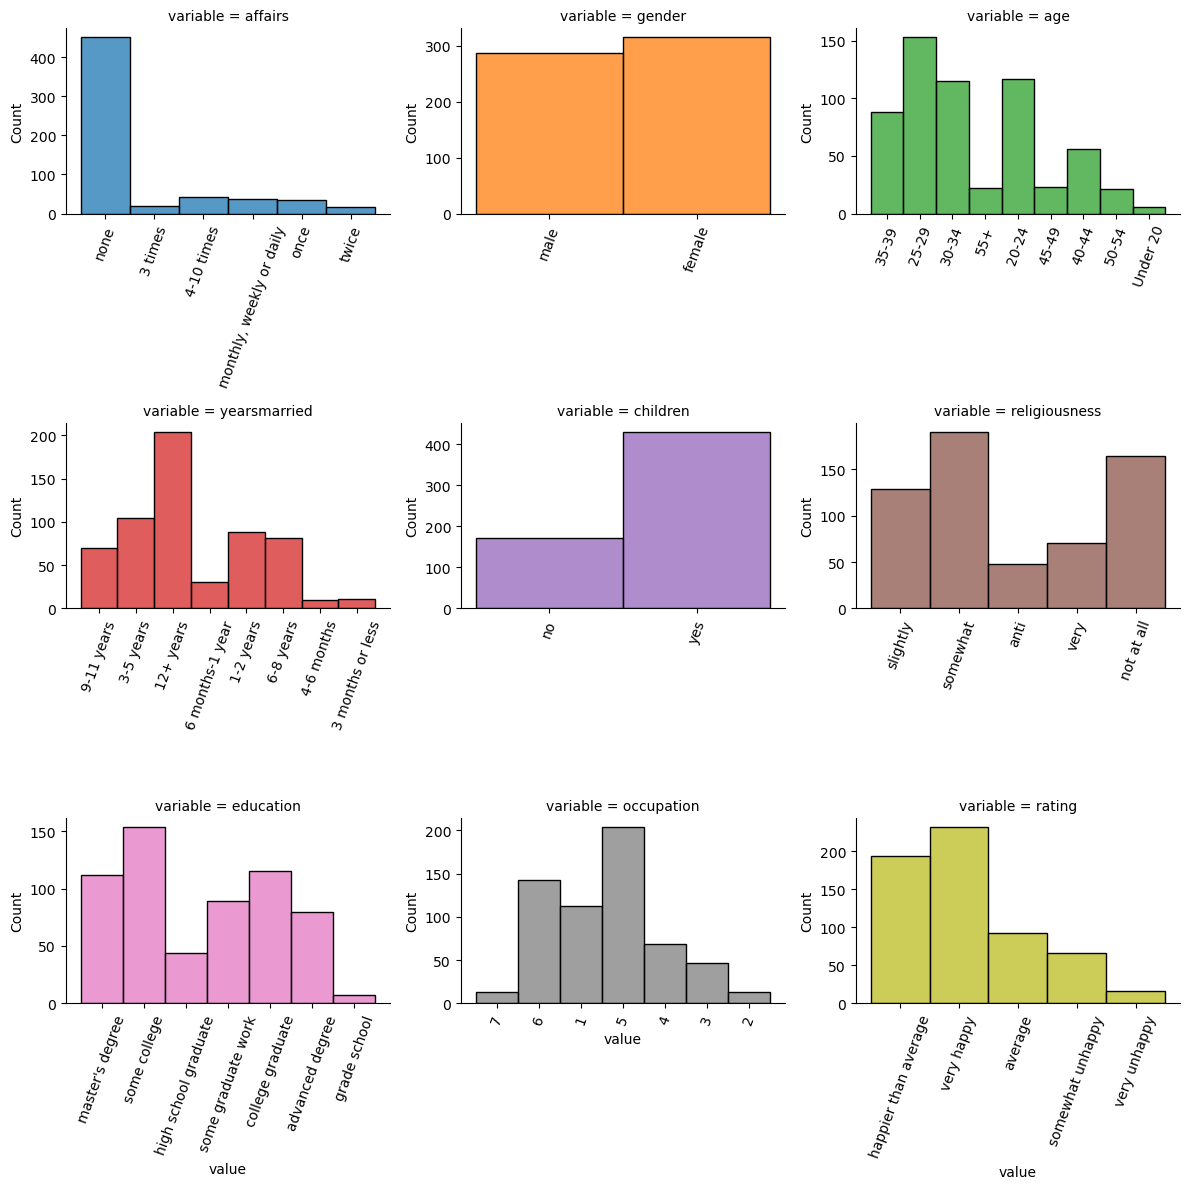

In [10]:
affairs_histplots = sns.FacetGrid(melt_affairs, col="variable", hue="variable", col_wrap=3, sharex=False,sharey=False, height = 4)
affairs_histplots.map_dataframe(sns.histplot, x = 'value')
affairs_histplots.set_xticklabels(rotation=70)
plt.tight_layout()

plt.show()

In [11]:
#features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [12]:
#affairs_dummies = pd.get_dummies(affairs_df[features])
#affairs_dummies
#בשביל הקורולציה

In [13]:
#correlation_matrix = affairs_dummies.corr().round(2)
#correlation_matrix

In [14]:
#sns.heatmap(data=correlation_matrix,cmap='Purples', annot=True)
#plt.show()
#הקורולציה

In [15]:
#sns.countplot(data = new_affairs, x = 'affairs', hue = 'rating').tick_params(axis='x',rotation=90)
#plt.show()

In [ ]:
only_affairs=affairs_df.loc[affairs_df.affairs!=0]
#only_affairs
#טבלת הבגידות במספרים

In [ ]:
#sns.countplot(data = only_affairs, x = 'affairs', hue = 'rating').tick_params(axis='x',rotation=90)
#plt.show()

In [ ]:
only_affairs2=new_affairs.loc[new_affairs.affairs!="none"]
#only_affairs2
#טבלת הבגידות במילים

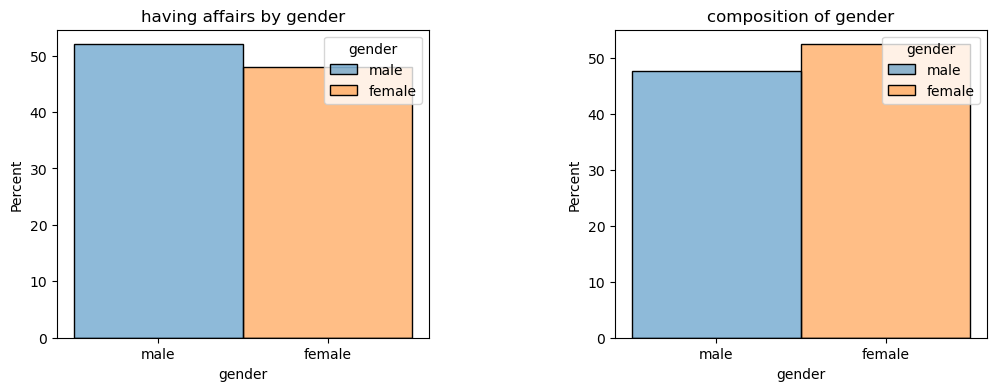

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

sns.histplot(data=only_affairs2, x ='gender',stat="percent",hue="gender",ax = ax1)
ax1.set_title("having affairs by gender")

sns.histplot(data=new_affairs, x ='gender',stat="percent",hue="gender",ax = ax2)
ax2.set_title("composition of gender")

plt.show()

The right diagram shows as the division between male and female who answer the survey, the left one shows us the division by the people who have an affair.
We can see that in the right diagram, the most of the people who answer the survey were female.
However,from the left diagerm we see that out of the group of people who have an affairs, the majority were male. 


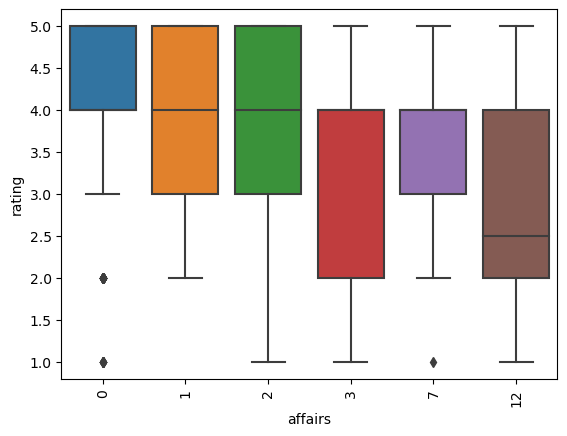

In [16]:
sns.boxplot(data = affairs_df, x = 'affairs', y = 'rating').tick_params(axis='x',rotation=90)
plt.show()

ניתן לראות לפי השרטוט של הבוקספלוט שאנשים שלא ניהלו רומן מדרגים את חיי הנישואים שלהם דירוג גבוה. ובצד השני הפוך, אנשים שמנהלים רומן באופן קבוע מדרגים את חיי הנישואים שלהם נמוך

In [27]:
#sns.histplot(data=only_affairs2, x ='rating').tick_params(axis='x',rotation=90)
#plt.show()

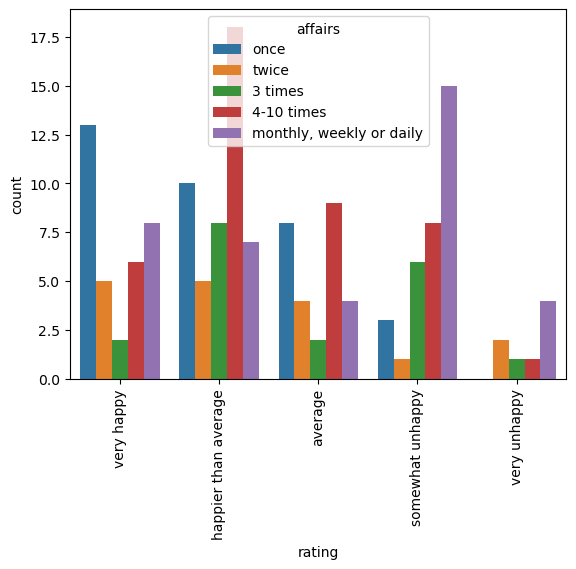

In [129]:
order=["very happy","happier than average","average","somewhat unhappy","very unhappy"]
hue_order=['once', 'twice', '3 times','4-10 times','monthly, weekly or daily']
sns.countplot(data = only_affairs2, x = 'rating', hue = 'affairs',order=order,hue_order=hue_order).tick_params(axis='x',rotation=90)
plt.show()

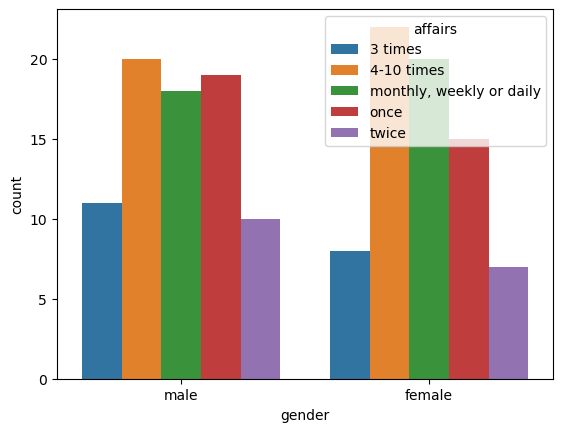

In [29]:
sns.countplot(data = only_affairs2, x = 'gender', hue = 'affairs')#.tick_params(axis='x',rotation=90)
plt.show()

למרות שהסקנו קודם כי גברים מנהלים יותר רומנים מנשים.
בגרף זה, אנו רואות כי רומנים מסוג הטווח הקצר מנוהלים יותר ע"י גברים. ומנגד הנשים מנהלות רומנים ארוכים ומתמשכים.

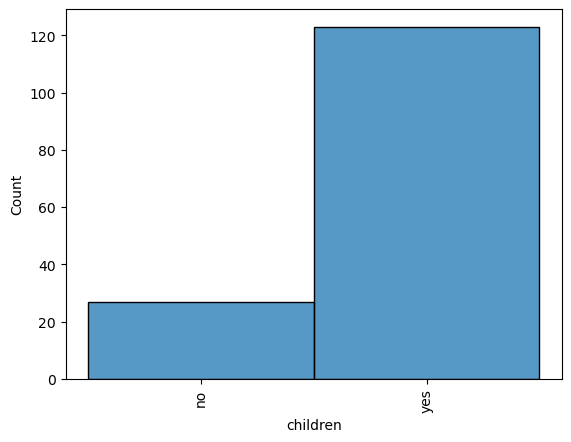

In [30]:
sns.histplot(data=only_affairs2, x ='children').tick_params(axis='x',rotation=90)
plt.show()

In [115]:
#sns.histplot(data=only_affairs,x="children",hue="rating",multiple="dodge").tick_params(axis="x",rotation=90)
#plt.show()

In [116]:
#only_affairs_dummies["children_no"]=only_affairs_dummies["children_no"].replace(0,None)
#only_affairs_dummies["children_yes"]=only_affairs_dummies["children_yes"].replace(0,None)


In [117]:
#only_affairs_dummies_groupby=only_affairs_dummies.groupby(["rating"])[["children_no","children_yes"]].count()
#only_affairs_dummies_groupby

In [88]:
yes_no=new_affairs.copy(deep=True)
yes_no['affairs']=yes_no['affairs'].replace({"none":"no","once":"yes","twice":"yes","3 times":"yes","4-10 times":"yes","monthly, weekly or daily":"yes"})
yes_no

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,index
0,no,male,35-39,9-11 years,no,slightly,master's degree,7,happier than average,0
1,no,female,25-29,3-5 years,no,somewhat,some college,6,happier than average,1
2,no,female,30-34,12+ years,yes,anti,high school graduate,1,happier than average,2
3,no,male,55+,12+ years,yes,very,master's degree,6,very happy,3
4,no,male,20-24,6 months-1 year,no,not at all,some graduate work,6,average,4
...,...,...,...,...,...,...,...,...,...,...
596,yes,male,20-24,1-2 years,yes,anti,high school graduate,2,very happy,596
597,yes,female,30-34,9-11 years,yes,not at all,master's degree,5,happier than average,597
598,yes,male,30-34,9-11 years,yes,not at all,some graduate work,6,very happy,598
599,yes,male,20-24,6-8 years,yes,slightly,master's degree,6,somewhat unhappy,599


In [113]:
prop_affairs3 = affairs_df.groupby("affairs")[['yearsmarried','age']].mean().reset_index()
prop_affairs3

,affairs,yearsmarried,age
0,0,7.727279,32.180710
1,1,6.567412,30.250000
2,2,11.058824,34.647059
3,3,8.921053,32.526316
4,7,9.904762,34.261905
5,12,11.394737,35.184211


In [137]:
rating_counts.to_frame('sum_rating').reset_index()

,rating,sum_rating
0,4,48
1,5,34
2,2,33
3,3,27
4,1,8
